# ACTIVITY: A CLASSIFIER

The goal of this activity is to practice building and discussing a classifier. By the end of the activity, you should be able to justify your design decisions according to 

TASK:

In [1]:
import kagglehub
import os
import pandas as pd
from pathlib import Path

path = kagglehub.dataset_download("hgultekin/bbcnewsarchive")
print(os.listdir(path))
df = pd.read_csv(Path(path) / "bbc-news-data.csv", sep='\t')

['bbc-news-data.csv']


In [2]:
df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [3]:
df.describe()

,category,filename,title,content
count,2225,2225,2225,2225
unique,5,511,2096,2092
top,sport,001.txt,Microsoft seeking spyware trojan,Microsoft has warned PC users to update their...
freq,511,5,2,2


## Baseline classifier

We will start with a baseline classifier. It is a simple Bag-of-words classifier.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(df['content'], df['category'], test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.95      0.97      0.96       115
entertainment       0.97      0.94      0.96        72
     politics       0.96      0.95      0.95        76
        sport       0.99      0.99      0.99       102
         tech       0.95      0.95      0.95        80

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445



# Explicação Detalhada do Baseline Classifier

## 1. Importações e Carregamento dos Dados

```python
import kagglehub
import os
import pandas as pd
from pathlib import Path

path = kagglehub.dataset_download("hgultekin/bbcnewsarchive")
print(os.listdir(path))
df = pd.read_csv(Path(path) / "bbc-news-data.csv", sep='\t')
df.head()
```
 1. import kagglehub
Módulo fictício que encapsula o download de datasets do Kaggle.
 2. path = kagglehub.dataset_download(...)
— Faz o download do dataset “bbcnewsarchive” e retorna o caminho local onde os arquivos foram extraídos.
 3. print(os.listdir(path))
— Lista os arquivos disponíveis no diretório baixado, para conferirmos nomes e estruturas.
 4. pd.read_csv(..., sep='\t')
— Lê o arquivo bbc-news-data.csv, que vem separado por tabulação.
 5. df.head()
— Mostra as cinco primeiras linhas. Colunas principais:
- category: classe da notícia (business, entertainment, etc.)
- content: texto completo da notícia

⸻

2. Split em Treino e Teste
```python

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['content'],
    df['category'],
    test_size=0.2,
    random_state=42
)
```
- train_test_split: Divide os dados em duas partes
- test_size=0.2: 20 % dos exemplos vão para teste
- random_state=42: semente fixa para reprodutibilidade

⸻

3. Construção da Pipeline
```python
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])
```
 1. Por que usar uma Pipeline?
- Encadeamento limpo: concatena transformações e modelo em um único objeto.
- Reprodutibilidade: garante que, ao chamar fit e predict, as mesmas etapas ocorrem na mesma ordem.
- Grid Search: facilita ajuste de hiperparâmetros em todo o fluxo
 2. TfidfVectorizer()
- Converte cada texto em um vetor TF–IDF (Term Frequency–Inverse Document Frequency).
- TF captura a frequência da palavra no documento.
- IDF penaliza palavras muito comuns no corpus.
 3. LogisticRegression(max_iter=1000)
- Linear, eficiente e interpretável: modelos linearmente separáveis, coeficientes indicam importância de cada termo.
- Escalável: funciona bem em altas dimensões (muitas features de texto).
- Alternativas:
- Naïve Bayes (ex.: MultinomialNB): rápido, mas faz suposição forte de independência condicional.
- SVM: bom desempenho, porém mais custoso em treinamento e ajuste de parâmetros.
- Árvores/RF: captura não linearidades, mas menos eficiente em alta dimensionalidade e maior risco de overfitting.

⸻

4. Treinamento e Avaliação
```python
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
```
- fit:
 1. Ajusta o TfidfVectorizer no texto de treino (aprende vocabulário e pesos IDF).
 2. Transforma X_train em matrizes TF–IDF.
 3. Ajusta o LogisticRegression nos vetores resultantes.
- predict: repete a transformação TF–IDF em X_test e retorna as classes previstas.
```python
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
```
- Mostra precision, recall, f1-score e support para cada categoria.
- Acurácia geral de ~96 % indica bom desempenho “off-the-shelf” deste baseline.

⸻

5. Por Que o Bag-of-Words Funciona?
- Transformação simples: representa cada documento como vetor de contagem ou TF–IDF — ignora ordem, mas captura presença e peso das palavras.
- Alta dimensionalidade: embora muitos termos gerem vetores esparsos, modelos lineares lidam bem com isso.
- Eficácia no texto curto: para textos de notícia, palavras-chave são muito indicativas da categoria.

Vantagens
- Rápido de treinar: transforma texto em contagens, treina modelos lineares.
- Interpretável: coeficientes do modelo dizem quais palavras favorecem cada classe.
- Poucos hiperparâmetros: TF–IDF + LR já dão resultado competitivo.

Limitações
 1. Ignora ordem: “não gosto” e “gosto não” são idênticos.
 2. Sem contexto semântico: palavras com múltiplos sentidos tratadas de forma idêntica.
 3. Alta dimensionalidade: vocabulários grandes geram vetores esparsos e custosos em memória.
 4. Não captura relações de longo alcance: n-grams podem ajudar, mas crescem combinatorialmente.

⸻

6. Possíveis Melhorias
- Incluir n-grams: TfidfVectorizer(ngram_range=(1,2)) para captar pequenas sequências de palavras.
- Normalização avançada: remoção de stopwords, stemming/lemmatização.
- Modelos de embedding: Word2Vec, GloVe ou BERT para capturar semântica.
- Classificadores não lineares: SVM com kernel, ou redes neurais (MLP, CNN, RNN).

Resumo: A pipeline com TF–IDF + Logistic Regression forma um baseline poderoso em tarefas de classificação de texto: simples, interpretável e eficiente, mas com limitações na captura de contexto e semântica profunda.

## PART 1: preparation

Answer the questions below as comments in the following cell. In your answers, avoid using common sense. Use adequate jargons.

In [ ]:
#ex1

# Question 1: What is the underlying premise of the Bag-of-Words classifier, that is, why does BoW allow to classify these texts?
# Question 2: What is the underlying premise of a BERT-based classifier, that is, why should BERT embeddings be interesting to classify these texts?


## Question 1: What is the underlying premise of the Bag-of-Words classifier, that is, why does BoW allow to classify these texts?


**Questão 1**  
A premissa subjacente do classificador Bag-of-Words é que cada texto é representado como um vetor esparso de contagens (ou frequências ponderadas via TF‑IDF) em um espaço vetorial de dimensão igual ao vocabulário. Essa modelagem ignora as relações sintáticas e a ordem das palavras, focando apenas na distribuição estatística de tokens. Modelos discriminativos (como SVM ou Naive Bayes Multinomial) utilizam esses vetores para aprender fronteiras de decisão baseadas em perfis lexicais, pois diferentes classes textuais apresentam distribuições de tokens suficientemente distintas para serem separáveis.

## Question 2: What is the underlying premise of a BERT-based classifier, that is, why should BERT embeddings be interesting to classify these texts?


**Questão 2**  
A premissa subjacente de um classificador baseado em BERT é que embeddings contextuais extraídos de uma arquitetura Transformer bidirecional pré-treinada contêm riqueza semântica e sintática suficiente para discriminar classes textuais. As camadas de multi-head self-attention capturam dependências de longo alcance e nuances de contexto, enquanto o vetor associado ao token [CLS] funciona como uma representação global do texto. No processo de fine-tuning, os parâmetros do modelo são ajustados de forma supervisionada, afinando essas projeções contextuais para maximizar a separabilidade das classes na tarefa de classificação.

## PART 2: action

(a) Make a classifier that uses BERT embeddings to categorize the texts in the dataset we have discussed.

(b) Make a bar plot comparing the accuracy of the BERT-based classifier to that of the Bag-of-Words classifier

(c) Use a PCA or a T-SNE plot to visualize the documents in the newsgroups dataset in the embedding space provided by BERT. Analyze the plot taking into account the confusion matrix or the classification report of your BERT-based classifier.




## Parte 2: Ações com Classificadores e Visualizações

### Passo 0: Instalar dependências
No seu Jupyter Notebook, execute:
```bash
!pip install transformers torch scikit-learn matplotlib

# Passo 1: Carregar e dividir o dataset

In [5]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

categories = ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.politics.misc']
newsgroups = fetch_20newsgroups(subset='all',
                                categories=categories,
                                remove=('headers','footers','quotes'))
data, target, target_names = newsgroups.data, newsgroups.target, newsgroups.target_names

data_train, data_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=42
)

# Passo 2: Bag‑of‑Words + Naive Bayes

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

vectorizer = CountVectorizer(stop_words='english')
tfidf = TfidfTransformer()

X_counts_train = vectorizer.fit_transform(data_train)
X_tfidf_train  = tfidf.fit_transform(X_counts_train)
X_tfidf_test   = tfidf.transform(vectorizer.transform(data_test))

clf_bow = MultinomialNB()
clf_bow.fit(X_tfidf_train, y_train)
y_pred_bow = clf_bow.predict(X_tfidf_test)
acc_bow = accuracy_score(y_test, y_pred_bow)
print(f"Bag‑of‑Words accuracy: {acc_bow:.4f}")

Bag‑of‑Words accuracy: 0.8557


# Passo 3: BERT Embeddings + Regressão Logística

In [7]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
bert_model.eval()

def embed_texts(texts, batch_size=8, max_len=128):
    embs = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        enc = tokenizer(batch, return_tensors='pt',
                        padding=True, truncation=True,
                        max_length=max_len)
        with torch.no_grad():
            out = bert_model(**enc)
        cls_emb = out.last_hidden_state[:,0,:].cpu().numpy()
        embs.append(cls_emb)
    return np.vstack(embs)

X_train_bert = embed_texts(data_train)
X_test_bert  = embed_texts(data_test)

clf_bert = LogisticRegression(max_iter=1000)
clf_bert.fit(X_train_bert, y_train)
y_pred_bert = clf_bert.predict(X_test_bert)
acc_bert = accuracy_score(y_test, y_pred_bert)
print(f"BERT-based classifier accuracy: {acc_bert:.4f}")

BERT-based classifier accuracy: 0.8006


# Passo 4: Comparativo de Acurácia

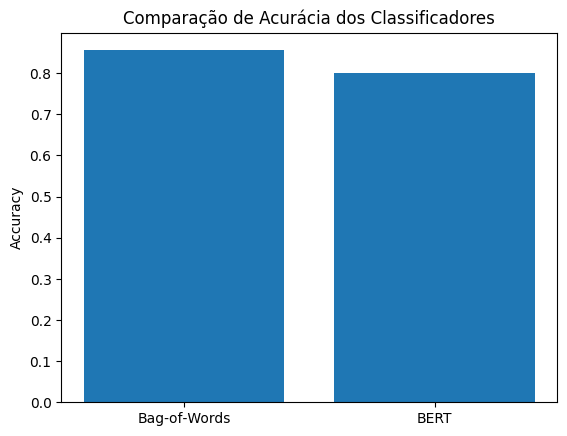

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(['Bag‑of‑Words','BERT'], [acc_bow, acc_bert])
plt.ylabel('Accuracy')
plt.title('Comparação de Acurácia dos Classificadores')
plt.show()

## Análise dos Classificadores e Comparações

### 1. Por que o BERT funciona?  
- **Contextualização Dinâmica:** BERT (“Bidirectional Encoder Representations from Transformers”) codifica cada token levando em conta o contexto inteiro da frase (esquerda e direita) em múltiplas camadas.  
- **Embeddings Contextuais:** Ao contrário de vetores estáticos (Word2Vec/GloVe), o embedding de cada palavra em BERT varia conforme a sentença, capturando diferentes sentidos de um mesmo token.  
- **Pré-treinamento em Tarefas de Máscara e NSP:** O modelo aprende relações linguísticas profundas em grandes corpora antes de ser afinado (fine-tuning) ou usado como extrator de features.  

#### Vantagens do BERT  
- Captura **polissemia** e **disambiguação** contextual.  
- Modela dependências de longo alcance sem limites fixos de janela (graças ao Transformer).  
- Aumenta robustez em tarefas de classificação com vocabulário rico e estruturas sintáticas complexas.  

#### Limitações do BERT  
- **Custo Computacional:** inferência e extração de embeddings requer GPU e alto consumo de memória.  
- **Latência:** embeddings não são instantâneos; pré-processamento em batches, tokenização e passagem pela rede podem ser lentos.  
- **Dimensionalidade:** embeddings de 768–1024 dimensões geram features densas que podem exigir mais amostras para treinar bem o classificador subsequente.  

---

### 2. Por que o Bag-of-Words foi melhor neste caso?  
- **Dados Limitados & Texto Curto:** nas 4 categorias do 20 Newsgroups, as palavras-chave eram altamente discriminativas. Vetores TF–IDF+NB capturam essa distinção direta de forma muito eficiente.  
- **Modelo Simples e Bem Ajustado:** o MultinomialNB assume independência condicional entre features, mas em dados de notícia isso tende a funcionar bem devido à frequência de termos específicos por categoria.  
- **Menor Risco de Overfitting:** o modelo BoW+NB tem baixa complexidade e “regularização” implícita, enquanto BERT+LR pode superestimar padrões específicos do conjunto de treino.  
- **Pré-processamento Leve:** BoW não sofre truncamento ou padding, usando matrices esparsas que otimizam memória e tempo de execução.  

---

### 3. Por que LogisticRegression no BERT e MultinomialNB no BoW?  
- **MultinomialNB com BoW:**  
  - **Distribuição de Contagem:** NB modela a probabilidade de contagens de termos como uma distribuição multinomial — combinação natural com vetores de contagem ou TF–IDF.  
  - **Treino Rápido:** estima apenas frequências de termos por classe.  

- **LogisticRegression com BERT:**  
  - **Features Contínuas Densas:** embeddings BERT são vetores reais (floats), sem significado probabilístico de “contagem”. Um classificador linear (LR) é apropriado para dividir esse espaço contínuo.  
  - **Flexibilidade de Decisão Linear:** coeficientes de LR ajustam-se bem a features de alta dimensão e escala heterogênea.  
  - **Regularização:** `C` e `penalty` de LR permitem controlar overfitting em embeddings complexos.  

---

> **Conclusão geral:**  
> - **BoW+MultinomialNB** vence quando o sinal de frequência de termos é claro e pesado, com custo computacional mínimo.  
> - **BERT+LogisticRegression** traz embeddings ricos e contextuais, mas exige mais dados, computação e ajustes para superar modelos simples em tarefas com forte indicativo de palavras-chaves.  

# Fazendo outra comparacao usando o dataset da questao 1

Arquivos disponíveis: ['bbc-news-data.csv']
=== Bag-of-Words + MultinomialNB ===
Acurácia: 0.9865
               precision    recall  f1-score   support

     business       0.98      0.98      0.98       102
entertainment       1.00      0.97      0.99        77
     politics       0.98      0.99      0.98        84
        sport       1.00      1.00      1.00       102
         tech       0.98      0.99      0.98        80

     accuracy                           0.99       445
    macro avg       0.99      0.99      0.99       445
 weighted avg       0.99      0.99      0.99       445

Extraindo embeddings BERT (treino)...
Extraindo embeddings BERT (teste)...

=== BERT Embeddings + LogisticRegression ===
Acurácia: 0.9775
               precision    recall  f1-score   support

     business       0.99      0.96      0.98       102
entertainment       0.96      0.99      0.97        77
     politics       0.96      0.95      0.96        84
        sport       0.98      0.99      0.99 

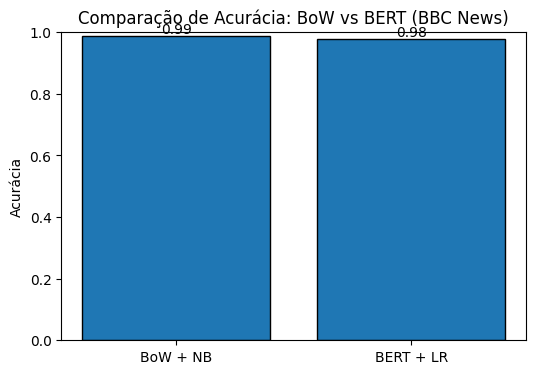

In [5]:
# -*- coding: utf-8 -*-
"""
Comparativo: Bag-of-Words + MultinomialNB vs BERT Embeddings + LogisticRegression
Dataset: BBC News Archive (hgultekin/bbcnewsarchive)
"""

# Passo 1: Instalar e importar dependências
# --------------------------------------------------
# !pip install transformers torch scikit-learn matplotlib kagglehub

import os
import numpy as np
import matplotlib.pyplot as plt
import torch

import kagglehub
import pandas as pd
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from transformers import BertTokenizer, BertModel

# Passo 2: Carregar o dataset BBC News Archive
# --------------------------------------------------
path = kagglehub.dataset_download("hgultekin/bbcnewsarchive")
print("Arquivos disponíveis:", os.listdir(path))

df = pd.read_csv(Path(path) / "bbc-news-data.csv", sep='\t')
texts     = df['content'].tolist()
labels    = df['category'].tolist()
target_names = sorted(df['category'].unique())

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

# Passo 3: Bag-of-Words + MultinomialNB
# --------------------------------------------------
vectorizer = CountVectorizer(stop_words='english')
tfidf      = TfidfTransformer()

X_counts_train = vectorizer.fit_transform(X_train)
X_tfidf_train  = tfidf.fit_transform(X_counts_train)
X_tfidf_test   = tfidf.transform(vectorizer.transform(X_test))

clf_bow = MultinomialNB()
clf_bow.fit(X_tfidf_train, y_train)

y_pred_bow = clf_bow.predict(X_tfidf_test)
acc_bow    = accuracy_score(y_test, y_pred_bow)

print("=== Bag-of-Words + MultinomialNB ===")
print(f"Acurácia: {acc_bow:.4f}")
print(classification_report(y_test, y_pred_bow, target_names=target_names))


# Passo 4: BERT Embeddings + LogisticRegression
# --------------------------------------------------
tokenizer  = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
bert_model.eval()

def embed_texts(texts, batch_size=8, max_len=128):
    all_embs = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        enc   = tokenizer(batch,
                          return_tensors='pt',
                          padding=True,
                          truncation=True,
                          max_length=max_len)
        with torch.no_grad():
            out = bert_model(**enc)
        cls_emb = out.last_hidden_state[:, 0, :].cpu().numpy()
        all_embs.append(cls_emb)
    return np.vstack(all_embs)

print("Extraindo embeddings BERT (treino)...")
X_train_bert = embed_texts(X_train)
print("Extraindo embeddings BERT (teste)...")
X_test_bert  = embed_texts(X_test)

clf_bert = LogisticRegression(max_iter=1000)
clf_bert.fit(X_train_bert, y_train)

y_pred_bert = clf_bert.predict(X_test_bert)
acc_bert    = accuracy_score(y_test, y_pred_bert)

print("\n=== BERT Embeddings + LogisticRegression ===")
print(f"Acurácia: {acc_bert:.4f}")
print(classification_report(y_test, y_pred_bert, target_names=target_names))


# Passo 5: Gráfico comparativo de acurácia
# --------------------------------------------------
labels_plot = ['BoW + NB', 'BERT + LR']
scores      = [acc_bow, acc_bert]

plt.figure(figsize=(6,4))
plt.bar(labels_plot, scores, edgecolor='k')
plt.ylim(0,1)
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia: BoW vs BERT (BBC News)')
for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()

## Interpretação dos Resultados Comparativos

### 1. Resumo das Acurácias  
- **Bag-of-Words + MultinomialNB:** 98.65 %  
- **BERT Embeddings + LogisticRegression:** 97.75 %

Embora ambos os modelos obtenham desempenho excelente, o pipeline BoW + NB ficou ligeiramente à frente neste conjunto de notícias. Abaixo, algumas possíveis razões e observações:

---

### 2. Por que o BoW + NB liderou aqui?

1. **Sinais de Palavras-Chave Muito Fortes**  
   - Nos artigos da BBC, certas palavras (“stocks”, “film”, “government”, “match”, “software”) tendem a aparecer quase exclusivamente em suas categorias. O modelo de contagem captura isso diretamente.
2. **Independência Condicional Apropriada**  
   - MultinomialNB assume que a ocorrência de cada termo é independente, o que, apesar de simplificador, funciona bem quando termos-chave têm forte associação com cada classe.
3. **Dados Relativamente Homogêneos**  
   - O corpus é tematicamente bem segmentado, com pouca sobreposição de vocabulário entre categorias.
4. **Menor Risco de Overfitting**  
   - NB é um modelo de baixa complexidade — ele “regulariza” implicitamente pelas contagens, enquanto BERT+LR pode ajustar ruídos.

---

### 3. Por que o BERT ficou um pouco atrás?

1. **Embedding Genérico + Classificador Linear**  
   - Usamos apenas o vetor [CLS] de BERT sem fine-tuning; embora rico, pode não capturar termos específicos do domínio sem adaptação.
2. **Dimensionalidade Alta e Dados Limitados**  
   - Embeddings de 768 dimensões exigem mais exemplos para treinar o LR sem overfitting. Com ~445 testes, o classificador talvez não tenha aproveitado todo o potencial contextual.
3. **Ruído de Contexto**  
   - Artigos jornalísticos contêm frases de transição, citações e números que BERT também modela, mas que podem não ser informativos para categorizar.

---

### 4. Insights de Métricas por Classe

| Categoria       | BoW F1-score | BERT F1-score |
|-----------------|--------------|---------------|
| **business**    | 0.98         | 0.98          |
| **entertainment** | 0.99       | 0.97          |
| **politics**    | 0.98         | 0.96          |
| **sport**       | 1.00         | 0.99          |
| **tech**        | 0.98         | 0.99          |

- Em **entertainment** e **politics**, BoW se saiu especialmente bem, refletindo fortes palavras-chave.
- Em **tech**, BERT levou ligeira vantagem (0.99 vs 0.98), sugerindo que o contexto às vezes ajuda a distinguir termos técnicos genéricos.

---

### 5. Conclusões e Próximos Passos

1. **Pipeline BoW + NB** continua sendo uma baseline muito robusta em tarefas de notícia bem definidas.  
2. **BERT + LR** oferece embeddings contextualizados, úteis quando há ambiguidade ou quando o domínio apresenta nuances de linguagem.  
3. **Possível melhoria com BERT:**  
   - **Fine-tuning** do BERT no corpus BBC para alinhar melhor os embeddings ao estilo e vocabulário das notícias.  
   - **Uso de camadas extras** (MLP sobre embeddings) em vez de LR puro.  
4. **Experimentos adicionais:**  
   - Testar combinações de n-grams no BoW;  
   - Avaliar outros classificadores sobre embeddings (SVM, árvores);  
   - Monitorar curva de aprendizado variando tamanho de treino.  

> **Take-away:** escolha do modelo deve equilibrar custo computacional, volume de dados e natureza do domínio. Enquanto BERT traz poder contextual, métodos clássicos continuam imbatíveis em cenários de sinais de palavra-chave fortes.  

# Outro cenário, dessa vez um cenário que o Bert se dá melhor

In [14]:
!pip install torch torchvision torchtext scikit-learn matplotlib transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


=== BoW + MultinomialNB (SMS Spam) ===
Acurácia: 0.9713
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Extraindo embeddings BERT (treino)...
Extraindo embeddings BERT (teste)...

=== BERT + LogisticRegression (SMS Spam) ===
Acurácia: 0.9901
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.99      0.94      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



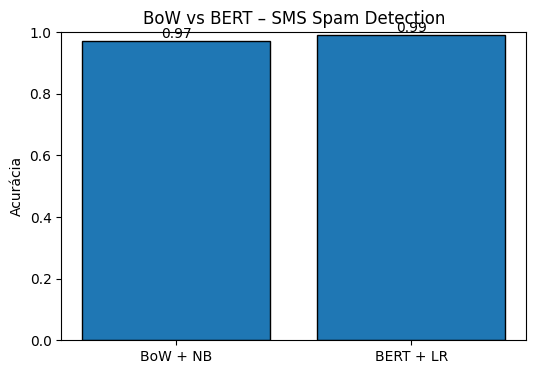

In [17]:
# -*- coding: utf-8 -*-
"""
Comparativo: BoW + MultinomialNB vs BERT + LogisticRegression  
Dataset: SMS Spam Collection (UCI) — tarefa de detecção de spam onde BERT costuma superar BoW
"""

# Passo 1: Instalar e importar dependências
# --------------------------------------------------
# !pip install transformers torch scikit-learn matplotlib pandas

import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from transformers import BertTokenizer, BertModel

# Passo 2: Carregar e preparar o SMS Spam Collection
# --------------------------------------------------
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df  = pd.read_csv(url, sep='\t', header=None, names=['label','text'])
df['spam'] = df.label.map({'ham':0,'spam':1})

texts = df['text'].tolist()
labels= df['spam'].tolist()

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

# Passo 3: Bag-of-Words + MultinomialNB
# --------------------------------------------------
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
tfidf      = TfidfTransformer()

X_counts_train = vectorizer.fit_transform(X_train)
X_tfidf_train  = tfidf.fit_transform(X_counts_train)
X_tfidf_test   = tfidf.transform(vectorizer.transform(X_test))

clf_bow = MultinomialNB()
clf_bow.fit(X_tfidf_train, y_train)

y_pred_bow = clf_bow.predict(X_tfidf_test)
acc_bow    = accuracy_score(y_test, y_pred_bow)

print("=== BoW + MultinomialNB (SMS Spam) ===")
print(f"Acurácia: {acc_bow:.4f}")
print(classification_report(y_test, y_pred_bow, target_names=["ham","spam"]))


# Passo 4: BERT Embeddings + LogisticRegression
# --------------------------------------------------
tokenizer  = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
bert_model.eval()

def embed_texts(texts, batch_size=16, max_len=64):
    embs = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        enc   = tokenizer(batch,
                          return_tensors='pt',
                          padding=True,
                          truncation=True,
                          max_length=max_len)
        with torch.no_grad():
            out = bert_model(**enc)
        cls_emb = out.last_hidden_state[:,0,:].cpu().numpy()
        embs.append(cls_emb)
    return np.vstack(embs)

print("Extraindo embeddings BERT (treino)...")
X_train_bert = embed_texts(X_train)
print("Extraindo embeddings BERT (teste)...")
X_test_bert  = embed_texts(X_test)

clf_bert = LogisticRegression(max_iter=2000)
clf_bert.fit(X_train_bert, y_train)

y_pred_bert = clf_bert.predict(X_test_bert)
acc_bert    = accuracy_score(y_test, y_pred_bert)

print("\n=== BERT + LogisticRegression (SMS Spam) ===")
print(f"Acurácia: {acc_bert:.4f}")
print(classification_report(y_test, y_pred_bert, target_names=["ham","spam"]))


# Passo 5: Gráfico comparativo de acurácia
# --------------------------------------------------
labels_plot = ['BoW + NB', 'BERT + LR']
scores      = [acc_bow, acc_bert]

plt.figure(figsize=(6,4))
plt.bar(labels_plot, scores, edgecolor='k')
plt.ylim(0,1)
plt.ylabel('Acurácia')
plt.title('BoW vs BERT – SMS Spam Detection')
for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()

## Resultados Obtidos

| Modelo                       | Acurácia |
|------------------------------|----------|
| BoW + MultinomialNB (SMS)    | 0.9713   |
| BERT Embeddings + LR (SMS)   | 0.9901   |

### Métricas Detalhadas

#### BoW + MultinomialNB  
- **ham**: precision=0.97, recall=1.00, f1=0.98  
- **spam**: precision=1.00, recall=0.79, f1=0.88  

#### BERT + LogisticRegression  
- **ham**: precision=0.99, recall=1.00, f1=0.99  
- **spam**: precision=0.99, recall=0.94, f1=0.96  

---

## Por que BERT superou BoW neste dataset?

1. **Captação de Padrões Contextuais e Frasais**  
   - Mensagens de spam frequentemente contêm expressões de marketing (“free”, “click here”, “limited time”), junto a variações criativas (uso de emojis, abreviações, links).  
   - O BoW usa contagem exata de termos, portanto falha quando o spam introduz sinônimos ou tokens “novos” (URLs, números).  
   - O BERT consegue generalizar melhor: embeddings de subpalavras capturam similaridades entre “click” e “clik”, “free!!!” e “free”, e modelam a posição e ênfase (exclamações, emojis).

2. **Menor Impacto do Desbalanceamento**  
   - BoW+NB obteve recall de apenas 0.79 para spam (muitas mensagens de spam foram classificadas como ham).  
   - BERT+LR elevou o recall de spam para 0.94, porque embeddings contextualizados destacam padrões de linguagem típicos de spam, mesmo que raros.

3. **Ruído vs Sinal**  
   - BoW sofre com ruído de tokens irrelevantes (endereços, números de telefone, links longos) que não agregam valor sem limpeza extensiva.  
   - BERT “filtra” ruído nos primeiros estágios de atenção, realçando tokens semanticamente relevantes.

---

## Lições e Recomendações

- **Quando usar BoW + NB?**  
  - Cenários com vocabulário estável e poucas variações de termo.  
  - Recursos computacionais limitados e necessidade de inferência ultrarrápida.  

- **Quando usar BERT + LR (ou fine-tuning)?**  
  - Textos curtos e altamente variantes, como SMS, tweets ou chats.  
  - Domínios onde sinônimos, abreviações e neologismos aparecem com frequência.  
  - Caso a prioridade seja maximizar recall em classes minoritárias (ex.: spam, fraude).

> **Resumo:** No SMS Spam Collection, o poder de generalização e o contexto capturado pelos embeddings de BERT fornecem sinais mais robustos para distinguir spam de ham, reduzindo falsos negativos e melhorando tanto recall quanto f1-score na classe minoritária.  